https://www.springboard.com/blog/data-science-interview-questions/

How do you deal with sparsity?
LASSO and its variants (e.g. LASSO + Boosting) might be interesting.



In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import math
import pandas as pd 
import numpy as np
import scipy.stats as st

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

import matplotlib.pyplot as plt

# Proba

#### Independence

Two events A and B are independent $\Leftrightarrow \mathcal{P}(A\cap B) = \mathcal{P}(A) \mathcal{P}(B)$

#### Conditional

For events A and B such that $\mathcal{P}(B) \neq 0$, we have:

$\displaystyle \mathcal{P}(A\mid B)={\frac {\mathcal{P}(A\cap B)}{P(B)}} = \frac{\mathcal{P}(B\mid A)\mathcal{P}(A)}{\mathcal{P}(B)}   $

#### Law of total probability

$\displaystyle \mathcal{P}(A)=\sum _{n}\mathcal{P}(A\cap B_{n})$

or, alternatively,

$\displaystyle \mathcal{P}(A)=\sum _{n}\mathcal{P}(A\mid B_{n})\mathcal{P}(B_{n})$

#### Inclusion–exclusion principle

$\displaystyle \left|\bigcup _{i=1}^{n}A_{i}\right|=\sum _{\emptyset \neq J\subseteq \{1,\ldots ,n\}}(-1)^{|J|+1}\left|\bigcap _{j\in J}A_{j}\right|$

example: $|A\cup B\cup C|=|A|+|B|+|C|-|A\cap B|-|A\cap C|-|B\cap C|+|A\cap B\cap C|$

#### Union, Intersection and Complement

$\mathcal{P}(A\cup B) = \mathcal{P}(A) + \mathcal{P}(B) - \mathcal{P}(A\cap B)$

$\displaystyle ({A\cup B})^{C}=A^{C}\cap B^{C}$

$\displaystyle ({A\cap B})^{C}=A^{C}\cup B^{C}$

### Sampling

$E$ a set of $n$ elements, $Card(\mathcal{P}(E)) = 2^n$

| Sampling  | Order matters | Order not matters |
| ------------- | ------------- | ---------- |
| With replacement  | $\displaystyle n^k$  | $\displaystyle \binom{n+k-1}{k}$     |
| Without replacement  | $\displaystyle \frac{n!}{(n-k)!}$  | $\displaystyle \binom{n}{k}$   |

In particular, the number of **permutation** of a set of $n$ elements is a sample where order matters without replacement => $n!$


Simple examples:
- choose 4 balls in a 10-balls numbered box successively with replacement => $10^4$
- choose 4 balls in a 10-balls numbered box successively without replacement => $\displaystyle  \frac{10!}{6!}$
- choose 4 balls in a 10-balls box simultaneously => $\displaystyle \binom{10}{4}$


Exercises:
- Loto: pick 7 numbers out of 49
- probability that at least 2 students have the same date of birth in a class of 30

### Usual Laws

#### discrets

<img src="pictures/law_discret.png" alt="Drawing" style="width: 600px;"/>

#### continus

<img src="pictures/law_continus.png" alt="Drawing" style="width: 600px;"/>

## Brain teaser 

- 2 Heads 1 tail, split the pot 1/4
- two children, one is a girl, proba the second is a girl ?
- revolver
- palantir
- google


# Stats

TODO :
- Monte carlo 
- Markov chain

### Variance

The variance of a random variable ${\displaystyle X}$ is the expected value of the squared deviation from the mean of ${\displaystyle X}$:

${\displaystyle \operatorname {Var} (X)=\operatorname {E} \left[(X-\operatorname {E} [X] )^{2}\right]} = \operatorname {E} [X^{2}]-\operatorname {E} [X]^{2}$

In [32]:
np.var([1,1,1])

0.0

In [33]:
np.var([0,1,2])

0.6666666666666666

### Covariance

In probability theory and statistics, covariance is a measure of the joint variability of two random variables.

If the greater values of one variable mainly correspond with the greater values of the other variable, and the same holds for the lesser values, (i.e., the variables tend to show similar behavior), the covariance is positive.

In the opposite case, when the greater values of one variable mainly correspond to the lesser values of the other, (i.e., the variables tend to show opposite behavior), the covariance is negative. 

The sign of the covariance therefore shows the tendency in the linear relationship between the variables. 

The magnitude of the covariance is not easy to interpret because it is not normalized and hence depends on the magnitudes of the variables. 

The normalized version of the covariance, the correlation coefficient, however, shows by its magnitude the strength of the linear relation.

${\displaystyle \operatorname {cov} (X,Y)=\operatorname {E} {{\big [}(X-\operatorname {E} [X])(Y-\operatorname {E} [Y]){\big ]}}} = \operatorname {E} \left[XY\right]-\operatorname {E} \left[X\right]\operatorname {E} \left[Y\right]	$


In [37]:
np.cov([1,1,1],[0,1,2])

array([[0., 0.],
       [0., 1.]])

In [38]:
np.cov([2,1,0],[0,1,2])

array([[ 1., -1.],
       [-1.,  1.]])

In [39]:
np.cov([0,1,2],[2,3,4])

array([[1., 1.],
       [1., 1.]])

In [40]:
np.cov([0,1,2],[2,3,5])

array([[1.        , 1.5       ],
       [1.5       , 2.33333333]])

### Pearson correlation coefficient

Pearson correlation coefficient is a measure of the linear correlation between two variables X and Y. According to the Cauchy–Schwarz inequality it has a value between +1 and −1, where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation.

${\displaystyle \rho _{X,Y}={\frac {\operatorname {cov} (X,Y)}{\sigma _{X}\sigma _{Y}}}}$

In [42]:
np.corrcoef([1,1,1],[0,1,2])

array([[nan, nan],
       [nan,  1.]])

In [43]:
np.corrcoef([2,1,0],[0,1,2])

array([[ 1., -1.],
       [-1.,  1.]])

In [44]:
np.corrcoef([0,1,2],[2,3,4])

array([[1., 1.],
       [1., 1.]])

In [46]:
np.corrcoef([0,1,2],[2,3,20])

array([[1.        , 0.88968025],
       [0.88968025, 1.        ]])

### Cross-correlation

Cross-correlation is somewhat a generalization of the correlation measure as it takes into account the lag of one signal relative to the other. If lag == 0, then correlation = cross-correlation.

### Spearman's rank correlation coefficient

Spearman's rank correlation coefficient is a nonparametric measure of rank correlation (statistical dependence between the rankings of two variables). It assesses how well the relationship between two variables can be described using a monotonic function.

For a sample of size n, the n raw scores ${\displaystyle X_{i},Y_{i}}$ are converted to ranks ${\displaystyle \operatorname {rg} X_{i},\operatorname {rg} Y_{i}}$, and $r_{s}$ is computed from:

${\displaystyle r_{s}=\rho _{\operatorname {rg} _{X},\operatorname {rg} _{Y}}={\frac {\operatorname {cov} (\operatorname {rg} _{X},\operatorname {rg} _{Y})}{\sigma _{\operatorname {rg} _{X}}\sigma _{\operatorname {rg} _{Y}}}}}$

where:
- $\rho $ denotes the usual Pearson correlation coefficient, but applied to the rank variables.
- ${\displaystyle \operatorname {cov} (\operatorname {rg} _{X},\operatorname {rg} _{Y})}$ is the covariance of the rank variables.
- ${\displaystyle \sigma _{\operatorname {rg} _{X}}}{\displaystyle \sigma _{\operatorname {rg} _{X}}}$ and ${\displaystyle \sigma}{\displaystyle \sigma }$ are the standard deviations of the rank variables.

In [47]:
x = [1,2,3]
y = [1,1000,1000000]
print("pearson : {}".format(pearson(x,y)))
print(st.spearmanr(x,y))

pearson : 0.8664578754912147
SpearmanrResult(correlation=1.0, pvalue=0.0)


In [48]:
x = list(range(100))
y = np.exp(x)                        
print("pearson : {}".format(pearson(x,y)))
print(st.spearmanr(x,y))      

pearson : 0.25203203390387025
SpearmanrResult(correlation=0.9999999999999999, pvalue=0.0)


### CLT

The central limit theorem establishes that, when identical independent random variables are added, their normalized sum tends toward a normal distribution (informally a "bell curve") even if the original variables themselves are not normally distributed. 

Let ${X_1, …, X_n}$ be a random sample of size n—that is, a sequence of independent and identically distributed (i.i.d.) random variables drawn from a distribution of expected value given by µ and finite variance given by $\sigma^2$. 

Suppose we are interested in the sample average ${\displaystyle S_{n}={\frac {X_{1}+\cdots +X_{n}}{n}}}$
of these random variables. 

By the law of large numbers, the sample averages converge in probability and almost surely to the expected value $\mu$ as n → ∞. 

The classical central limit theorem describes the size and the distributional form of the stochastic fluctuations around the deterministic number $\mu$ during this convergence: 

${\displaystyle \frac {\left(S_{n}-\mu \right)} {\sigma/\sqrt {n} }\ {\xrightarrow {\mathcal {L}}}\ {\mathcal {N}}(0 ,1).}$

Use case: Suppose that we are interested in estimating the average height among all people. Collecting data for every person in the world is impossible. While we can’t obtain a height measurement from everyone in the population, we can still sample some people. The question now becomes, what can we say about the average height of the entire population given a single sample. The Central Limit Theorem addresses this question exactly.

### Sampling distribution

Given a population has a mean $\mu$ and a standard deviation $\sigma$, a sample of it has:

$\operatorname {E} \left[\bar  x\right] \sim \mu$

$\displaystyle \sigma _{\bar  x} \sim {\frac  {\sigma }{{\sqrt  {n}}}}$

### Z-score

$\displaystyle \mathcal{Z} = \frac {\operatorname {E} \left[\bar  x\right] - \mu}{\sigma _\bar  x} $

$\displaystyle \mathcal{Z}$ can be expressed as the *number of standard deviation below the mean*

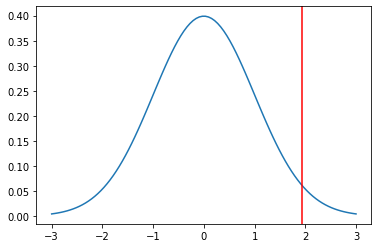

In [19]:
l = [-3,1,2,3,6,9]
Z = (np.mean(l) - 0) / (np.std(l)/math.sqrt(len(l)))

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, st.norm.pdf(x, mu, sigma))
plt.axvline(Z,c="r")
plt.show()

### Confidence interval

$\displaystyle CI = \operatorname {E} \left[\bar x \right] \pm z^* \sigma _{\bar  x}  $

Where:
- $z^*$ is the value corresponding to the $\alpha$ (confidence) quantile from the normal distribution ${\mathcal {N}}(0 ,1)$
- $\displaystyle z^* \sigma _{\bar  x}$ can be expressed as the *margin of error*

In [20]:
quantile_2_tails = .95
quantile_1_tail = (1+quantile_2_tails)/2
z = st.norm.ppf(quantile_1_tail)
print(z)
st.norm.cdf(z)

1.959963984540054


0.975

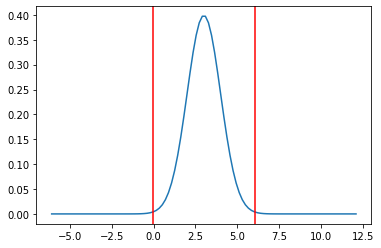

In [21]:
l = [-3,1,2,3,6,9]

mean = np.mean(l)
me = z*np.std(l)/math.sqrt(len(l))
left = mean-me
right = mean+me

sigma = math.sqrt(variance)
x = np.linspace(mean - 3*me, mean + 3*me, 100)
plt.plot(x, st.norm.pdf(x, mean, 1))
plt.axvline(left,c="r")
plt.axvline(right,c="r")
plt.show()

### p-value

In statistical hypothesis testing, the p-value or probability value is the probability of obtaining test results at least as extreme as the results actually observed during the test, assuming that the null hypothesis is correct.

If the probability of obtaining a result as extreme as the one obtained, supposing that the null hypothesis were true, is lower than a pre-specified cut-off probability (for example, 5%), then the result is said to be statistically significant and the null hypothesis is rejected.

$\displaystyle p = \mathcal{P} \left(\mathcal{Z}>z\right) < \alpha 
\Leftrightarrow \mathcal{Z} > z^*
\Longleftrightarrow \frac {\operatorname {E} \left[\bar  x\right] - \mu}{\sigma _\bar  x} > z^* $

Where:
- $z^*$ is the value corresponding to the $\alpha$ (confidence) quantile from the normal distribution ${\mathcal {N}}(0 ,1)$

##### Example:

A principal at a certain school claims that the students in his school are above average intelligence. A random sample of thirty students IQ scores have a mean score of 112. Is there sufficient evidence to support the principal’s claim? The mean population IQ is 100 with a standard deviation of 15.

- H0: “the student of his school are not on average more intelligent”
- H1: “the student of his school are on average more intelligent”

In [31]:
mu = 100
mean_x_bar = 112
SE = 15/math.sqrt(30)

Z = (mean_x_bar-mu)/SE
quantile = .95
z = st.norm.ppf((1+quantile)/2)

Z>z

True

Hence, we reject the null hypothesis.

Two-sided / one sided:

<img src="pictures/CI.png" alt="Drawing" style="width: 600px;"/>

### Type of errors

<img src="pictures/errortypes.png" alt="Drawing" style="width: 400px;"/>

### p-value vs z-test

𝑝-value indicates how unlikely the statistic is. 

𝑧-score indicates how far away from the mean it is. 

There may be a difference between them, depending on the sample size:
- for large samples, even small deviations from the mean become unlikely. I.e. the 𝑝-value may be very small even for a low 𝑧-score. 
- conversely, for small samples even large deviations are not unlikely. I.e. a large 𝑧-score will not necessarily mean a small 𝑝-value.

### t-test vs z-test

Like z-tests, t-tests are calculations used to test a hypothesis, but they are most useful when we need to determine if there is a statistically significant difference between two independent sample groups. In other words, a t-test asks whether a difference between the means of two groups is unlikely to have occurred because of random chance. Usually, t-tests are most appropriate when dealing with problems with a limited sample size (n < 30).

$\displaystyle t = \frac {\left(x_1 — x_2\right)} {\left(\frac{\sigma} {\sqrt{n_1}} + \frac{\sigma} {\sqrt{n_2}}\right)}$

Where:
- $x_1$ = mean of sample 1
- $x_2$ = mean of sample 2
- $n_1$ = size of sample 1
- $n_2$ = size of sample 2

### Test Comparison

𝑧-test. A 𝑧-test assumes that our observations are independently drawn from a Normal distribution with unknown mean and known variance. A 𝑧-test is used primarily when we have quantitative data. (i.e. weights of rodents, ages of individuals, systolic blood pressure, etc.) However, 𝑧-tests can also be used when interested in proportions. (i.e. the proportion of people who get at least eight hours of sleep, etc.)

𝑡-test. A 𝑡-test assumes that our observations are independently drawn from a Normal distribution with unknown mean and unknown variance. Note that with a 𝑡-test, we do not know the population variance. This is far more common than knowing the population variance, so a 𝑡-test is generally more appropriate than a 𝑧-test, but practically there will be little difference between the two if sample sizes are large.

With 𝑧- and 𝑡-tests, your alternative hypothesis will be that your population mean (or population proportion) of one group is either not equal, less than, or greater than the population mean (or proportion) or the other group. This will depend on the type of analysis you seek to do, but your null and alternative hypotheses directly compare the means/proportions from the two groups.

Chi-squared test. Whereas 𝑧- and 𝑡-tests concern quantitative data (or proportions in the case of 𝑧), chi-squared tests are appropriate for qualitative data. Again, the assumption is that observations are independent of one another. In this case, you aren't seeking a particular relationship. Your null hypothesis is that no relationship exists between variable one and variable two. Your alternative hypothesis is that a relationship does exist. This doesn't give you specifics as to how this relationship exists (i.e. In which direction does the relationship go) but it will provide evidence that a relationship does (or does not) exist between your independent variable and your groups.

Fisher's exact test. One drawback to the chi-squared test is that it is asymptotic. This means that the 𝑝-value is accurate for very large sample sizes. However, if your sample sizes are small, then the 𝑝-value may not be quite accurate. As such, Fisher's exact test allows you to exactly calculate the 𝑝-value of your data and not rely on approximations that will be poor if your sample sizes are small.

<img src="pictures/hyptest.png" alt="Drawing" style="width: 600px;"/>

### ANOVA

<img src="pictures/ftest.png" alt="Drawing" style="width: 600px;"/>

# Unsupervised Learning

### Kmeans / dendrogram / elbow method

- Assignment step: Assign each observation to the cluster whose mean has the least squared Euclidean distance, this is intuitively the "nearest" mean
- Update step: Calculate the new means (centroids) of the observations in the new clusters.

The Forgy method randomly chooses k observations from the dataset and uses these as the initial means. The Random Partition method first randomly assigns a cluster to each observation and then proceeds to the update step, thus computing the initial mean to be the centroid of the cluster's randomly assigned points.

## PCA

### Definition

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components. 

This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. 

The resulting vectors (each being a linear combination of the variables and containing n observations) are an uncorrelated orthogonal basis set. PCA is sensitive to the relative scaling of the original variables.

1. The PCs are essentially the linear combinations of the original variables.
2. The PCs are orthogonal.
3. The least important PCs are also sometimes useful in regression, outlier detection, etc.

### Calculation

1. Normalize the data

2. Calculate the covariance matrix

3. Calculate the eigenvalues and eigenvectors of the covariance matrix

4. Choosing components and forming a feature vector:

We order the eigenvalues from largest to smallest so that it gives us the components in order or significance. Here comes the dimensionality reduction part. If we have a dataset with n variables, then we have the corresponding n eigenvalues and eigenvectors. It turns out that the eigenvector corresponding to the highest eigenvalue is the principal component of the dataset and it is our call as to how many eigenvalues we choose to proceed our analysis with. To reduce the dimensions, we choose the first p eigenvalues and ignore the rest. We do lose out some information in the process, but if the eigenvalues are small, we do not lose much.

Next we form a feature vector which is a matrix of vectors, in our case, the eigenvectors. In fact, only those eigenvectors which we want to proceed with. Since we just have 2 dimensions in the running example, we can either choose the one corresponding to the greater eigenvalue or simply take both.

$Feature Vector = (eig1, eig2)$

5. Forming Principal Components:

We take the transpose of the feature vector and left-multiply it with the transpose of scaled version of original dataset.

$NewData = FeatureVector^T x ScaledData^T$

In [ ]:
# Load Digits Data And Make Sparse
digits = datasets.load_digits()
# Standardize the feature matrix
X = StandardScaler().fit_transform(digits.data)
# Create a PCA with 2 components
pca = PCA(n_components=2, whiten=True)
# Conduct PCA
X_pca = pca.fit_transform(X)
print()
# Show results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])
print('Variance retained:', pca.explained_variance_ratio_)

plt.figure(figsize=(20,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [ ]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# Supervised learning

## Generalities 

<img src="pictures/biasvar.png" alt="Drawing" style="width: 600px;"/>

### Metrics

- Mean Absolute Error is the average of the difference between the Original Values and the Predicted Values. It gives us the measure of how far the predictions were from the actual output. However, they don’t gives us any idea of the direction of the error i.e. whether we are under predicting the data or over predicting the data. Mathematically, it is represented as :

$\displaystyle \operatorname {MAE} ={\frac {1}{n}}\sum _{i=1}^{n}|Y_{i}-{\hat {Y_{i}}}|$

- Mean Squared Error(MSE): is quite similar to Mean Absolute Error, the only difference being that MSE takes the average of the square of the difference between the original values and the predicted values. The advantage of MSE being that it is easier to compute the gradient, whereas Mean Absolute Error requires complicated linear programming tools to compute the gradient. As, we take square of the error, the effect of larger errors become more pronounced then smaller error, hence the model can now focus more on the larger errors.

$\displaystyle \operatorname {MSE} ={\frac {1}{n}}\sum _{i=1}^{n}(Y_{i}-{\hat {Y_{i}}})^{2}$

- accuracy: It is the ratio of number of correct predictions to the total number of input samples.

$\displaystyle accuracy = \frac{TP+FP}{TOT}$

- Precision : It is the number of correct positive results divided by the number of positive results predicted by the classifier.

$\displaystyle precision = \frac{TP}{TP+FP}$

- Recall or Sensitivity or TPR: It is the number of correct positive results divided by the number of all relevant samples (all samples that should have been identified as positive). e.g. email spam

$\displaystyle recall = \frac{TP}{TP+FN}$

- False Positive Rate: False Positive Rate corresponds to the proportion of negative data points that are mistakenly considered as positive, with respect to all negative data points. e.g. cancer

$\displaystyle FPR = \frac{FP}{TN+FP} = 1-Specificity$

- F1 Score is the Harmonic Mean between precision and recall. The range for F1 Score is [0, 1]. It tells you how precise your classifier is (how many instances it classifies correctly), as well as how robust it is (it does not miss a significant number of instances).
High precision but lower recall, gives you an extremely accurate, but it then misses a large number of instances that are difficult to classify. The greater the F1 Score, the better is the performance of our model. Mathematically, it can be expressed as :

$\displaystyle F1 = \frac{2}{\frac{1}{precision}+\frac{1}{recall}}$

- Area Under Curve(AUC) is one of the most widely used metrics for evaluation. It is used for binary classification problem. AUC of a classifier is equal to the probability that the classifier will rank a randomly chosen positive example higher than a randomly chosen negative example.

<img src="pictures/roc.png" alt="Drawing" style="width: 1000px;"/>

- Logarithmic Loss or Log Loss, works by penalising the false classifications. Accuracy is the count of predictions where your predicted value equals the actual value. Accuracy is not always a good indicator because of its yes or no nature. Log Loss takes into account the uncertainty of your prediction based on how much it varies from the actual label. This gives us a more nuanced view into the performance of our model. Log-loss values [0,+inf[, objective 0.


<h1><center>$-{(y\log(p) + (1 - y)\log(1 - p))}$</center></h1>

Example:
- label = 1 and predicted probability of .25: $-{\log(.25)}$
- label = 0 and predicted probability of .25: $-{\log(0.75)}$

<img src="pictures/logloss1.png" alt="Drawing" style="width: 600px;"/>

<img src="pictures/logloss2.png" alt="Drawing" style="width: 600px;"/>

### bagging / boosting / stacking

- Bootstrapping: Let’s begin by defining bootstrapping. This statistical technique consists in generating samples of size B (called bootstrap samples) from an initial dataset of size N by randomly drawing with replacement B observations.

<img src="pictures/bootstrap.png" alt="Drawing" style="width: 400px;"/>

- Bagging: First, we create multiple bootstrap samples so that each new bootstrap sample will act as another (almost) independent dataset drawn from true distribution. Then, we can fit a weak learner for each of these samples and finally aggregate them such that we kind of “average” their outputs and, so, obtain an ensemble model with less variance that its components. Roughly speaking, as the bootstrap samples are approximatively independent and identically distributed (i.i.d.), so are the learned base models. Then, “averaging” weak learners outputs do not change the expected answer but reduce its variance (just like averaging i.i.d. random variables preserve expected value but reduce variance).


- Boosting: each model in the sequence is fitted giving more importance to observations in the dataset that were badly handled by the previous models in the sequence. Intuitively, each new model focus its efforts on the most difficult observations to fit up to now, so that we obtain, at the end of the process, a strong learner with lower bias (even if we can notice that boosting can also have the effect of reducing variance). The final result is the weigthed (how well they performed) average of the learners.

<img src="pictures/bagboo1.png" alt="Drawing" style="width: 600px;"/>

<img src="pictures/bagboo2.png" alt="Drawing" style="width: 600px;"/>


- Stacking: the predict proba outputs of every models becomes the feature of a new dataset on which you apply a new model (Logistic Regression generally or heuristic).

### Gradient

<img src="pictures/learningrate.png" alt="Drawing" style="width: 400px;"/>

Help gradient descent:
- feature scale
- mean normalization: $x = x - \mu$

## Algorithms

TODO:
- bayesian method


- support vector machine
- decision tree
- Naive Bayes

### KNN

- In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

<img src="pictures/knn_c.png" alt="Drawing" style="width: 400px;"/>

- In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.


How is k-NN different from k-means clustering?

k-NN, or k-nearest neighbors is a classification algorithm, where the k is an integer describing the number of neighboring data points that influence the classification of a given observation. K-means is a clustering algorithm, where the k is an integer describing the number of clusters to be created from the given data.

## Linear Regression

- $n$: number of features
- $x^i$: ith example
- $x_j^i$: jth feature of the ith example

<h1><center>$\large h_\theta(x)=\theta^T x$</center></h1>

where: 
- $\theta \in {\rm I\!R}^{n+1}$
- $x \in {\rm I\!R}^{n+1}$ with $x_0^i=0$

<h1><center>$ \displaystyle J(\theta) = \frac{1}{m} \sum_{i=1}^{m} (y^i-h_\theta(x^i))^2$</center></h1>

Repeat until converge: 
<h1><center>$ \displaystyle \theta_j = \theta_j -\alpha \frac{\partial J(\theta)}{\partial \theta_j}
    = \theta_j -\frac{\alpha}{m} \sum_{i=1}^{m} (y^i-h_\theta(x^i))x^i_j
$</center></h1>

- analytical solution: normal equation
- polynomial regression: add power of x as features

## Logistic Regression

<h1><center>$\displaystyle \sigma (t)={\frac {1}{1+e^{-t}}}$</center></h1>

<h1><center>$\displaystyle h_{\theta }(X)={\frac {1}{1+e^{-\theta ^{T}X}}}=\Pr(Y=1\mid X;\theta )$</center></h1>

<h1><center>$ \displaystyle l(\theta) = \sum_{i=1}^{m} y^i \log(h_\theta(x^i)) + (1-y^i) \log(1-h_\theta(x^i)) $</center></h1>

Repeat ($l(\theta)$ to maximize): 

<h1><center>$ \displaystyle \theta_j = \theta_j + \alpha \frac{\partial l(\theta)}{\partial \theta_j}
    = \theta_j + \alpha (y^i-h_\theta(x^i))x^i_j
$</center></h1>

Regularisation:
- Lasso : L1 $ \displaystyle \Longrightarrow l(\theta) + \lambda \sum_{j=1}^{m} \left| \theta_j \right|$
- Ridge : L2 $ \displaystyle \Longrightarrow l(\theta) + \lambda \sum_{j=1}^{m} \theta_j^2$
- Elastic Net: combinaison of both

<img src="pictures/ridgelasso.png" alt="Drawing" style="width: 600px;"/>

 In the ridge, the coefficients of the linear transformation are normal distributed and in the lasso they are Laplace distributed. In the lasso, this makes it easier for the coefficients to be zero and therefore easier to eliminate some of your input variable as not contributing to the output.

## Neural network

### Implementation

#### 0. intialisation :

W -> matrix random but small

b -> vector zeros

#### 1. forward propagation :

⁃ linaire: $Z[l] = W[l] * A[l-1] + b[l]$ with $A[0] = X$

⁃ activation function g: $A[l] = g( Z[l] )$

- output: $A[l]$ and cache Z[l]

<img src="pictures/forwardprop.png" alt="Drawing" style="width: 400px;"/>

#### 2. compute cost :

several cost function possible but beware of convexity !!

<h1><center>$ \displaystyle - \frac{1}{m} (Y \log(A[L]).T + (1-Y) \log( 1 - A[L] ).T ) $</center></h1>

With A[L] output layer

#### 3. backward propagation :

- Activation backward : $dZ[l] = dA[l] * g_l’( Z[l] )$
- Linear backward : calcul $dW[l]$, $db[l]$ $\Rightarrow{A[l-1]}$

<img src="pictures/backwardprop.png" alt="Drawing" style="width: 600px;"/>

#### 4. update_param :
parameters -= alpha*grad with parameters = W,b

#### model :
reiter all steps on n_iter

### Parameters vs Hyperparameters

Main parameters of the NN is $W$ and $b$.

Hyper parameters (parameters that control the algorithm) are like:
- Learning rate.
- Number of iteration.
- Number of hidden layers L.
- Number of hidden units n.
- Choice of activation functions.


### Activation functions

<table><tr>
<td> <img src="pictures/activationfct.png" alt="Drawing" style="width: 400px;"/></td>
<td> <img src="pictures/activationfct2.png" alt="Drawing" style="width: 400px;"/></td>
</tr></table>

Activation functions are used to introduce non-linearities in the linear output of the type w * x + b in a neural network.

Sigmoid and tanh should not be used as activation function for the hidden layer. This is because of the vanishing gradient problem, i.e., if your input is on a higher side (where sigmoid goes flat) then the gradient will be near zero. This will cause very slow or no learning during backpropagation as weights will be updated with really small values. The best function for hidden layers is thus ReLu, although, the dead neurons may happen if you use ReLU non-linarity, which is called dying ReLU.

- for binary classification : relu -> relu -> … -> sigmoid
- for multi class classification : relu -> relu -> … -> softmax
- for regression : relu -> relu -> … -> linear

### Regularization

- dropout regularization : randomly turns off neurons
- vanishing/explode gradient (for deep network) -> xavier initialisation 
- early stopping: J still decreases but the prediction is worse

### Model Optimizers

The optimizer is a search technique, which is used to update weights in the model.

- mini-batch gradient: for big data set, splits the dataset in batch and update weights at the end of the batch within an iteration
- learning rate decay
- SGD: Stochastic Gradient Descent and how to address problems like getting stuck in a local minima or a saddle point. 
- RMSprop: Adaptive learning rate optimization method.
- Adam: Adaptive Moment Estimation (Adam) that also uses adaptive learning rates.

### Types of neural networks

- Standard NN (Useful for Structured data)
- CNN or convolutional neural networks (Useful in computer vision)
- RNN or Recurrent neural networks (Useful in Speech recognition or NLP)

RNNs (recurrent neural networks) are made up of one node. It is fed data then outputs aresult back into itself, and continues to do this. Breakthroughs like LSTM (long short termmemory) make it smart at remembering things that have happened in the past and findingpatterns across time to make its next guesses make sense.

CNNs (convolutional neural networks) essentially have three parts, convolution layers, pooling layers, and fully-connected layers. It usually takes a 2D (sometimes moredimensions) matrix and outputs a result.

Convolution starts at the top left and takes a small window with a certain width and heightand performs an operation on that, the operation is usually a matrix multiplication where thematrix to multiply by is decided via gradient descent to get the best final results. It then moves according to a stride parameter and does the same. It does this all the way across the image and outputs a new image. 

Pooling is similar in the sense that it breaks the image down using small windows; however,the operation it runs on this small window is usually (average, max, or min) to combine thesmall window into a single pixel. 

### NLP

- TFIDF: In information retrieval, tf–idf or TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling. The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general. tf–idf is one of the most popular term-weighting schemes today; 83% of text-based recommender systems in digital libraries use tf–idf.


- Levenshtein distance is a string metric for measuring the difference between two sequences. Informally, the Levenshtein distance between two words is the minimum number of single-character edits (insertions, deletions or substitutions) required to change one word into the other.


- A word embedding is a learned representation for text where words that have the same meaning have a similar representation. The position of a word within the vector space is learned from text and is based on the words that surround the word when it is used. The position of a word in the learned vector space is referred to as its embedding. Two popular examples of methods of learning word embeddings from text include: Word2Vec, GloVe.

## random forest / GBM (gradient boosting machine)

- The random forest approach is a bagging method where deep trees, fitted on bootstrap samples, are combined to produce an output with lower variance. However, random forests also use another trick to make the multiple fitted trees a bit less correlated with each others: when growing each tree, instead of only sampling over the observations in the dataset to generate a bootstrap sample, we also sample over features and keep only a random subset of them to build the tree.


# Languages comparison

https://www.geeksforgeeks.org/c-vs-java-vs-python/

https://www.javatips.net/blog/c-vs-java-vs-python-a-comparison


### Interpreted (python) vs compiled languages (C/Java)

The difference between an interpreted and a compiled language lies in the result of the process of interpreting or compiling. An interpreter produces a result from a program, while a compiler produces a program written in assembly language. The assembler of architecture then turns the resulting program into binary code. Assembly language varies for each individual computer, depending upon its architecture. Consequently, compiled programs can only run on computers that have the same architecture as the computer on which they were compiled.

### Python: pass by assignment

Remember that arguments are passed by assignment in Python. Since assignment just creates references to objects, there’s no alias between an argument name in the caller and callee, and so no call-by-reference per se. You can achieve the desired effect in a number of ways.

If you pass a mutable object into a method, the method gets a reference to that same object and you can mutate it to your heart's delight, but if you rebind the reference in the method, the outer scope will know nothing about it, and after you're done, the outer reference will still point at the original object.

If you pass an immutable object to a method, you still can't rebind the outer reference, and you can't even mutate the object.

### Python: id() 

This identity has to be unique and constant for this object during the lifetime. Two objects with non-overlapping lifetimes may have the same id() value. If we relate this to C, then they are actually the memory address, here in Python it is the unique id. This function is generally used internally in Python.

### Python: memory

In Python, memory is managed in a private heap space. This means that all the objects and data structures will be located in a private heap. However, the programmer won’t be allowed to access this heap. Instead, the Python interpreter will handle it. At the same time, the core API will enable access to some Python tools for the programmer to start coding. The memory manager will allocate the heap space for the Python objects while the inbuilt garbage collector will recycle all the memory that’s not being used to boost available heap space. 

## Python: Mutable vs immutable

Common immutable type:
- numbers: int(), float(), complex()
- immutable sequences: str(), tuple(), frozenset(), bytes()

Common mutable type (almost everything else):
- mutable sequences: list(), bytearray()
- set type: set()
- mapping type: dict()
- classes, class instances
All immutable built-in objects in python are hashable. Mutable containers like lists and dictionaries are not hashable while immutable container tuple is hashable

Tuples are smaller. Tuples have structure, lists have order, set are list without order

# SQL


### What is a primary key?

A primary key is a combination of fields which uniquely specify a row. This is a special kind of unique key, and it has implicit NOT NULL constraint. It means, Primary key values cannot be NULL.

### What is a unique key?

A Unique key constraint uniquely identified each record in the database. This provides uniqueness for the column or set of columns.

A Primary key constraint has automatic unique constraint defined on it. But not, in the case of Unique Key.

There can be many unique constraint defined per table, but only one Primary key constraint defined per table.

### What is a foreign key?

A foreign key is one table which can be related to the primary key of another table. Relationship needs to be created between two tables by referencing foreign key with the primary key of another table.
e.g Order table with foreign key person_id from table person

### What is a constraint?

Constraint can be used to specify the limit on the data type of table. Constraint can be specified while creating or altering the table statement. Sample of constraint are.

- NOT NULL.
- CHECK.
- DEFAULT.
- UNIQUE.
- PRIMARY KEY.
- FOREIGN KEY.

### Which operator is used in query for pattern matching?

LIKE operator is used for pattern matching, and it can be used as -.

- % - Matches zero or more characters.
- _ – Matching exactly one character.


`Select * from Student where studentname like 'a%'`

`Select * from Student where studentname like ‘ami_'`

### What is Union, minus and Intersect commands?

UNION operator is used to combine the results of two tables, and it eliminates duplicate rows from the tables.

UNION ALL does not (eliminate duplicates).

MINUS/EXEPT operator is used to return rows from the first query but not from the second query. 

INTERSECT operator is used to return rows returned by both the queries.